In [13]:
import numpy as np
import matplotlib.pyplot as pp

In [35]:
nc = 20
cityxy = np.random.rand(nc,2)

(-0.1, 1.1)

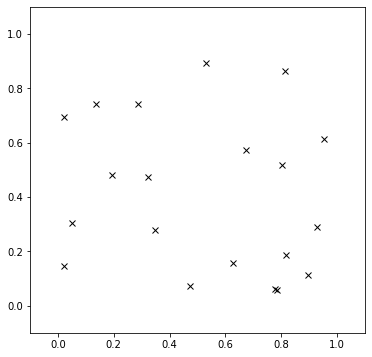

In [36]:
pp.figure(figsize=(6,6))
pp.plot(cityxy[:,0], cityxy[:,1], 'kx')
pp.xlim([-0.1,1.1])
pp.ylim([-0.1,1.1])

In [37]:
path = np.arange(nc)
np.random.shuffle(path)
path

array([12,  5,  6,  0,  2, 13,  8, 19, 14,  1, 18, 11, 16, 17, 10,  9,  7,
        3,  4, 15])

In [38]:
def pathlength(cs, p):
    d = 0
    for i in range(nc):
        d += np.sqrt(sum( (cs[p[i]]-cs[p[i-1]])**2 ))
    return d

In [39]:
pathlength(cityxy, path)

11.184988284089192

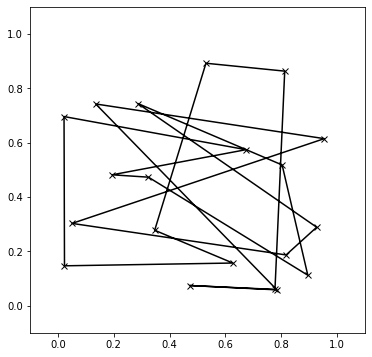

In [40]:
def plotpath(cs,p):
    pp.figure(figsize=(6,6))
    pp.plot(cityxy[:,0], cityxy[:,1], 'kx')
    pr = np.concatenate([p, [p[0]]])
    pp.plot(cityxy[pr,0], cityxy[pr,1], 'k-')
    pp.xlim([-0.1,1.1])
    pp.ylim([-0.1,1.1])
    
plotpath(cityxy, path)

[18 10 13  9 16  0  4 15 17  1 14 11  3 19  8  6  7  5  2 12]
7.109319548858492


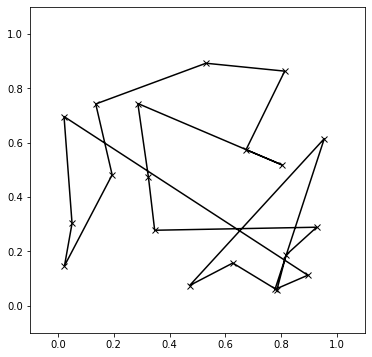

In [65]:
def changepath(p):
    q = np.copy(p)
    i = np.random.randint(nc)
    q[i] = p[i-1]
    q[i-1] = p[i]
    return q

nstep = 100000
lengths = np.zeros(nstep)
paths = np.zeros((nstep,nc), dtype='int8')
paths[0] = path
lengths[0] = pathlength(cityxy, paths[0])
for i in range(1,nstep):
    paths[i] = changepath(paths[i-1])
    lengths[i] = pathlength(cityxy, paths[i])
bestpath = paths[lengths == np.min(lengths)][0]
plotpath(cityxy, bestpath)
print(bestpath)
print(pathlength(cityxy, bestpath))